In [1]:
#import the nueral network libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
#import the cnn layers
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

#image preprocessing (or) data Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
x_train =train_datagen.flow_from_directory("C:/Users/haris/OneDrive/Desktop/classification-of-Arrhythmia/Code/ECG-Dataset/Dataset/train",target_size=(64,64),batch_size=32,class_mode="categorical")


Found 15341 images belonging to 6 classes.


In [7]:
x_test = test_datagen.flow_from_directory("C:/Users/haris/OneDrive/Desktop/classification-of-Arrhythmia/Code/ECG-Dataset/Dataset/test",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 6825 images belonging to 6 classes.


In [8]:
x_train.class_indices

{'Left Bundle Branch Block': 0,
 'Normal': 1,
 'Premature Atrial Contraction': 2,
 'Premature Ventricular Contractions': 3,
 'Right Bundle Branch Block': 4,
 'Ventricular Fibrillation': 5}

In [9]:
#initialize the model
model=Sequential()

In [10]:
#convolutional model
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))
#here 32 indiates no.of feature detectors and(3,3) is feature detector size

In [11]:
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
#flatten layer
model.add(Flatten())

#hidden layers

In [13]:
model.add(Dense(units=200,activation="relu",kernel_initializer="random_uniform"))

In [14]:
model.add(Dense(units=300,activation="relu",kernel_initializer="random_uniform"))

#output layer


In [15]:
model.add(Dense(units=6,activation="softmax",kernel_initializer="random_uniform"))

#compile model

In [16]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#train your  model

In [17]:
tr=model.fit_generator(x_train,steps_per_epoch=480,epochs=25,validation_data=x_test,validation_steps=10)
#steps_per_epoch =>total trainging images/batch size
#validation_steps=>total testing images/batch size

C:\Users\haris\AppData\Local\Temp\ipykernel_14968\1370298909.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  tr=model.fit_generator(x_train,steps_per_epoch=480,epochs=25,validation_data=x_test,validation_steps=10)


Epoch 1/25
480/480 [==============================] - 87s 178ms/step - loss: 0.9403 - accuracy: 0.6650 - val_loss: 0.6864 - val_accuracy: 0.7625
Epoch 2/25
480/480 [==============================] - 87s 181ms/step - loss: 0.3387 - accuracy: 0.8931 - val_loss: 0.4659 - val_accuracy: 0.8594
Epoch 3/25
480/480 [==============================] - 85s 177ms/step - loss: 0.2356 - accuracy: 0.9259 - val_loss: 0.6305 - val_accuracy: 0.8156
Epoch 4/25
480/480 [==============================] - 90s 187ms/step - loss: 0.1702 - accuracy: 0.9482 - val_loss: 0.4248 - val_accuracy: 0.8719
Epoch 5/25
480/480 [==============================] - 85s 177ms/step - loss: 0.1397 - accuracy: 0.9572 - val_loss: 0.6356 - val_accuracy: 0.8344
Epoch 6/25
480/480 [==============================] - 86s 180ms/step - loss: 0.1056 - accuracy: 0.9679 - val_loss: 0.6817 - val_accuracy: 0.8687
Epoch 7/25
480/480 [==============================] - 313s 653ms/step - loss: 0.0842 - accuracy: 0.9741 - val_loss: 0.9815 - val_a

In [18]:
tr.history

{'loss': [0.940251886844635,
  0.3386785089969635,
  0.2356240302324295,
  0.1701829731464386,
  0.13972952961921692,
  0.1056017056107521,
  0.08421590179204941,
  0.07142758369445801,
  0.07348457723855972,
  0.05966091528534889,
  0.05643954128026962,
  0.052617598325014114,
  0.0476662777364254,
  0.043814871460199356,
  0.03605734556913376,
  0.07519923895597458,
  0.037214864045381546,
  0.030696231871843338,
  0.02784036099910736,
  0.03408822789788246,
  0.03833264485001564,
  0.03439980000257492,
  0.031706344336271286,
  0.026294130831956863,
  0.0320059210062027],
 'accuracy': [0.6649501323699951,
  0.893096923828125,
  0.9258849024772644,
  0.9481781125068665,
  0.9572387933731079,
  0.9679290652275085,
  0.974121630191803,
  0.9760119915008545,
  0.9776416420936584,
  0.980770468711853,
  0.9825304746627808,
  0.9835734367370605,
  0.9847467541694641,
  0.9857897162437439,
  0.9891141653060913,
  0.9759467840194702,
  0.987940788269043,
  0.9900919198989868,
  0.9906134009

#to save the best accuracy got in the epoch we willn use this callback and checkpoint

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("best_model_{epoch:02d}.h5",monitor="val_accuracy",save_best_only=True,mode="Max")
lr = model.fit_generator(x_train,steps_per_epoch=480,callbacks=[checkpoint],validation_steps=10)

#saving the model

In [20]:
#for storing temporary
model.save('ECG.h5')

C:\Users\haris\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
#for storing permanent in drive
model.save("C:/Users/haris/OneDrive/Desktop/classification-of-Arrhythmia/Code/ECG-Dataset/ECG.h5")

In [22]:
losses=tr.history['loss']
accuracy=tr.history['accuracy']
epochs=list(range(1,26))


In [23]:
tr.history['loss'][5]

0.1056017056107521

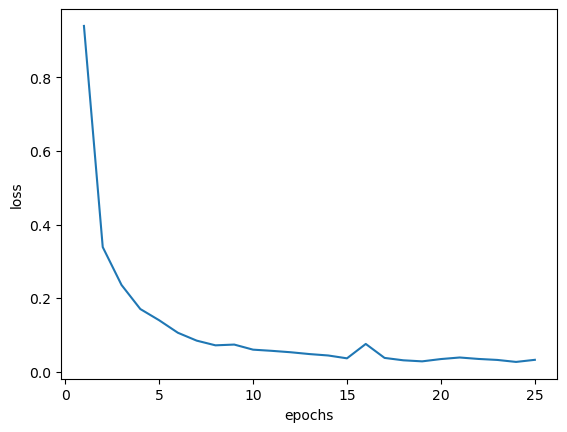

In [28]:
import matplotlib.pyplot as plt
plt.plot(epochs,losses)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

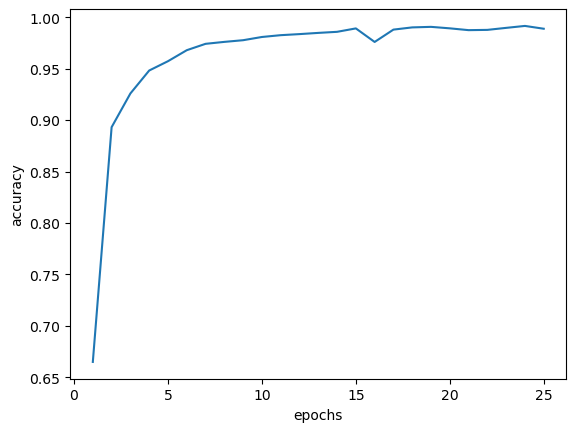

In [29]:
plt.plot(epochs,accuracy)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [26]:
losses=tr.history['loss']
accuracy=tr.history['accuracy']
val_accuarcy=tr.history['val_accuracy']
epochs=list(range(1,26))


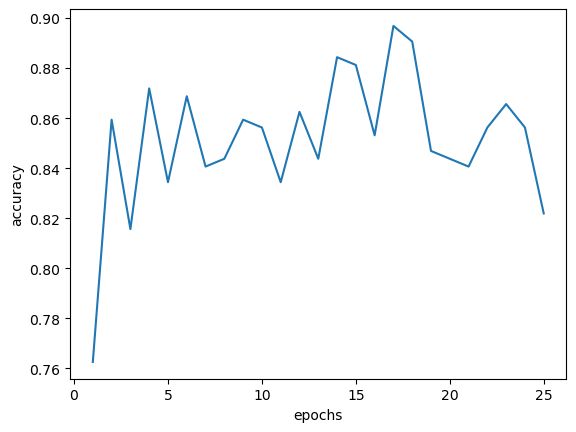

In [27]:
plt.plot(epochs,val_accuarcy)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()